## 0) Loading Libraries

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Preprocessing
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, make_scorer, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import joblib
import time


## 1) Understanding The Data

In [74]:
training_data = pd.read_csv('train_dataset_final1.csv')
testing_data = pd.read_csv('validate_dataset_final.csv')

In [75]:
training_data.head()
testing_data.head()
testing_data.shape
testing_data.shape

(5016, 26)

In [76]:
training_data.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

In [77]:
testing_data.isnull().sum()

Customer_ID          0
marriage             0
sex                  0
education            0
LIMIT_BAL            0
age                  0
pay_0                0
pay_2                0
pay_3                0
pay_4                0
pay_5                0
pay_6                0
Bill_amt1            0
Bill_amt2            0
Bill_amt3            0
Bill_amt4            0
Bill_amt5            0
Bill_amt6            0
pay_amt1             0
pay_amt2             0
pay_amt3             0
pay_amt4             0
pay_amt5             0
pay_amt6             0
AVG_Bill_amt         0
PAY_TO_BILL_ratio    0
dtype: int64

In [78]:
training_data['age'].fillna(training_data['age'].median , inplace = True)


C:\Users\udayt\AppData\Local\Temp\ipykernel_16012\2014185215.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0        25.0
1        24.0
2        63.0
3        43.0
4        32.0
         ... 
25242    33.0
25243    49.0
25244    31.0
25245    40.0
25246    58.0
Name: age, Length: 25247, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_data['age'].fillna(training_data['age'].median , inplace = True)


In [79]:
training_data.dtypes

Customer_ID             int64
marriage                int64
sex                     int64
education               int64
LIMIT_BAL               int64
age                    object
pay_0                   int64
pay_2                   int64
pay_3                   int64
pay_4                   int64
pay_5                   int64
pay_6                   int64
Bill_amt1             float64
Bill_amt2             float64
Bill_amt3             float64
Bill_amt4             float64
Bill_amt5             float64
Bill_amt6             float64
pay_amt1              float64
pay_amt2              float64
pay_amt3              float64
pay_amt4              float64
pay_amt5              float64
pay_amt6              float64
AVG_Bill_amt          float64
PAY_TO_BILL_ratio     float64
next_month_default      int64
dtype: object

In [80]:
training_data['marriage'] = training_data['marriage'].astype('category')
training_data['sex'] = training_data['sex'].astype('category')
training_data['education'] = training_data['education'].astype('category')

In [81]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_ID         25247 non-null  int64   
 1   marriage            25247 non-null  category
 2   sex                 25247 non-null  category
 3   education           25247 non-null  category
 4   LIMIT_BAL           25247 non-null  int64   
 5   age                 25247 non-null  object  
 6   pay_0               25247 non-null  int64   
 7   pay_2               25247 non-null  int64   
 8   pay_3               25247 non-null  int64   
 9   pay_4               25247 non-null  int64   
 10  pay_5               25247 non-null  int64   
 11  pay_6               25247 non-null  int64   
 12  Bill_amt1           25247 non-null  float64 
 13  Bill_amt2           25247 non-null  float64 
 14  Bill_amt3           25247 non-null  float64 
 15  Bill_amt4           25247 non-null  

## 2) Exploratory Data Analayisis (EDA)

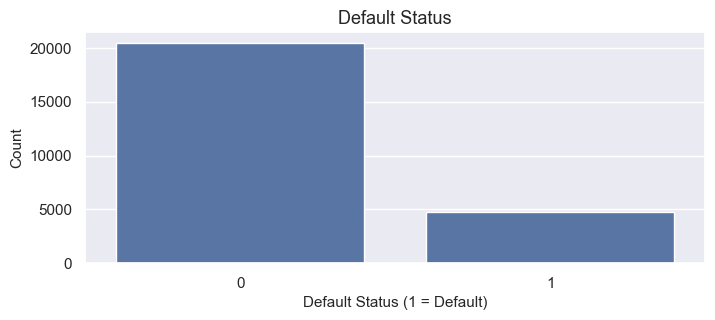

In [82]:
plt.figure(figsize=(8,3))
sns.countplot(x='next_month_default', data= training_data)
plt.title('Default Status')
plt.xlabel('Default Status (1 = Default)')
plt.ylabel('Count')
plt.show()

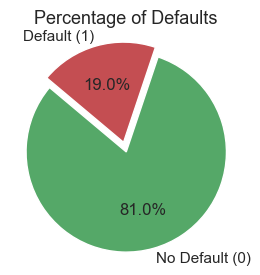

In [83]:
default_counts = training_data['next_month_default'].value_counts()
labels = ['No Default (0)', 'Default (1)']
colors = ['#05316b', '#5c0000']

plt.figure(figsize=(3, 3), )
plt.pie(default_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors='green', explode=(0, 0.1))
plt.title('Percentage of Defaults')
plt.axis('equal')
plt.show()

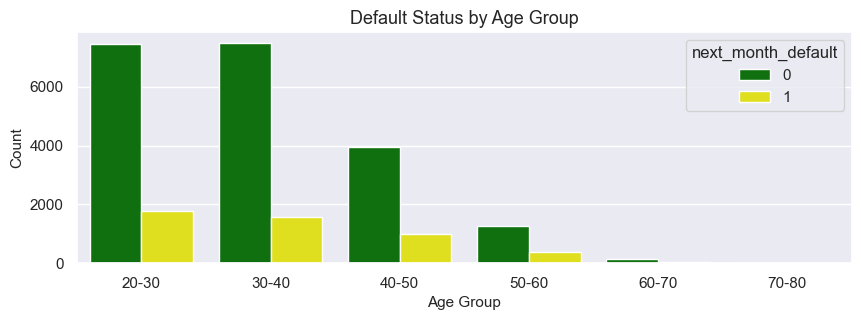

In [84]:
training_data['age'] = pd.to_numeric(training_data['age'], errors='coerce')
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
training_data['AGE_GROUP'] = pd.cut(training_data['age'], bins=bins, labels=labels)
plt.figure(figsize=(10,3))
sns.countplot(x='AGE_GROUP', hue='next_month_default', data=training_data , palette={0: 'green', 1: 'Yellow'})
plt.title('Default Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

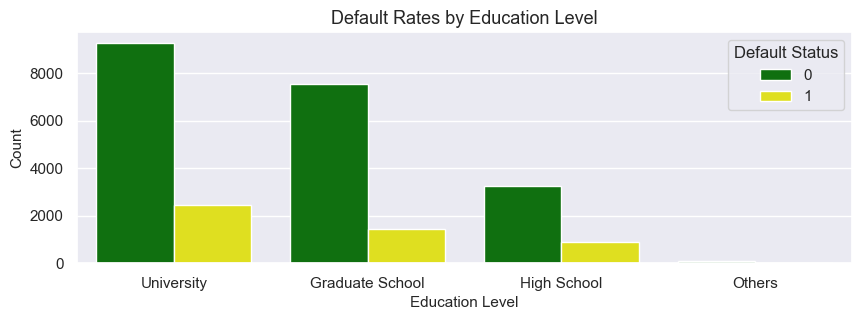

In [85]:
education_labels = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
}
training_data['education_label'] = training_data['education'].map(education_labels)

plt.figure(figsize=(10, 3))
sns.countplot(x='education_label', hue='next_month_default', data = training_data,palette={0: 'green', 1: 'Yellow'})
plt.title('Default Rates by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Default Status')
plt.show()

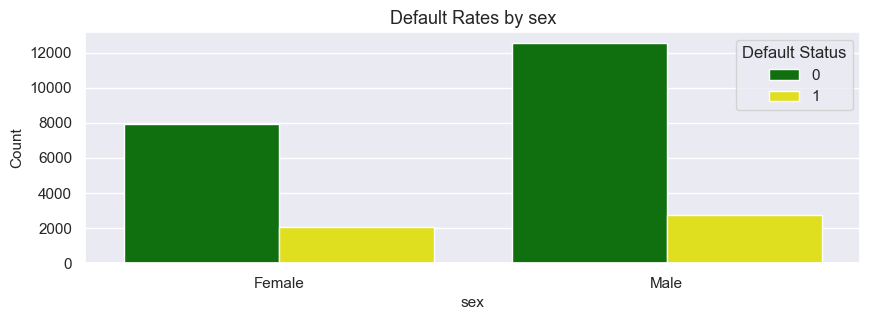

In [86]:
sex_labels = {
    0: 'Female',
    1: 'Male'
}
training_data['sex_label'] = training_data['sex'].map(sex_labels)

plt.figure(figsize=(10, 3))
sns.countplot(x='sex_label', hue='next_month_default', data=training_data,palette={0: 'green', 1: 'Yellow'})
plt.title('Default Rates by sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='Default Status')
plt.show()

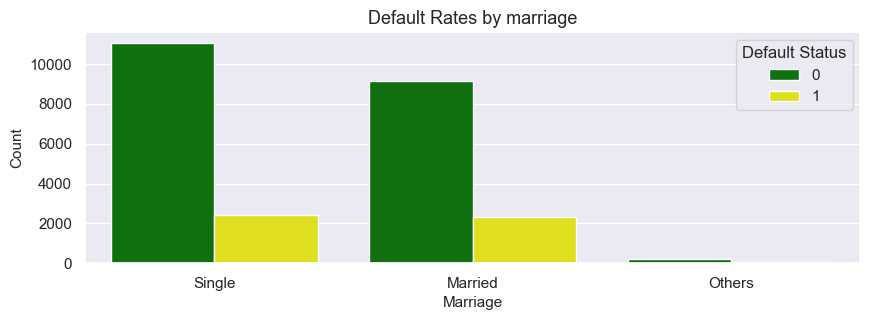

In [87]:
Marriage_status = {
    1: 'Married',
    2: 'Single',
    3: 'Others'
    }
training_data['Marriage_status'] = training_data['marriage'].map(Marriage_status)

plt.figure(figsize=(10, 3))
sns.countplot(x='Marriage_status', hue='next_month_default', data=training_data , palette={0: 'green', 1: 'Yellow'})
plt.title('Default Rates by marriage')
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.legend(title='Default Status')
plt.show()

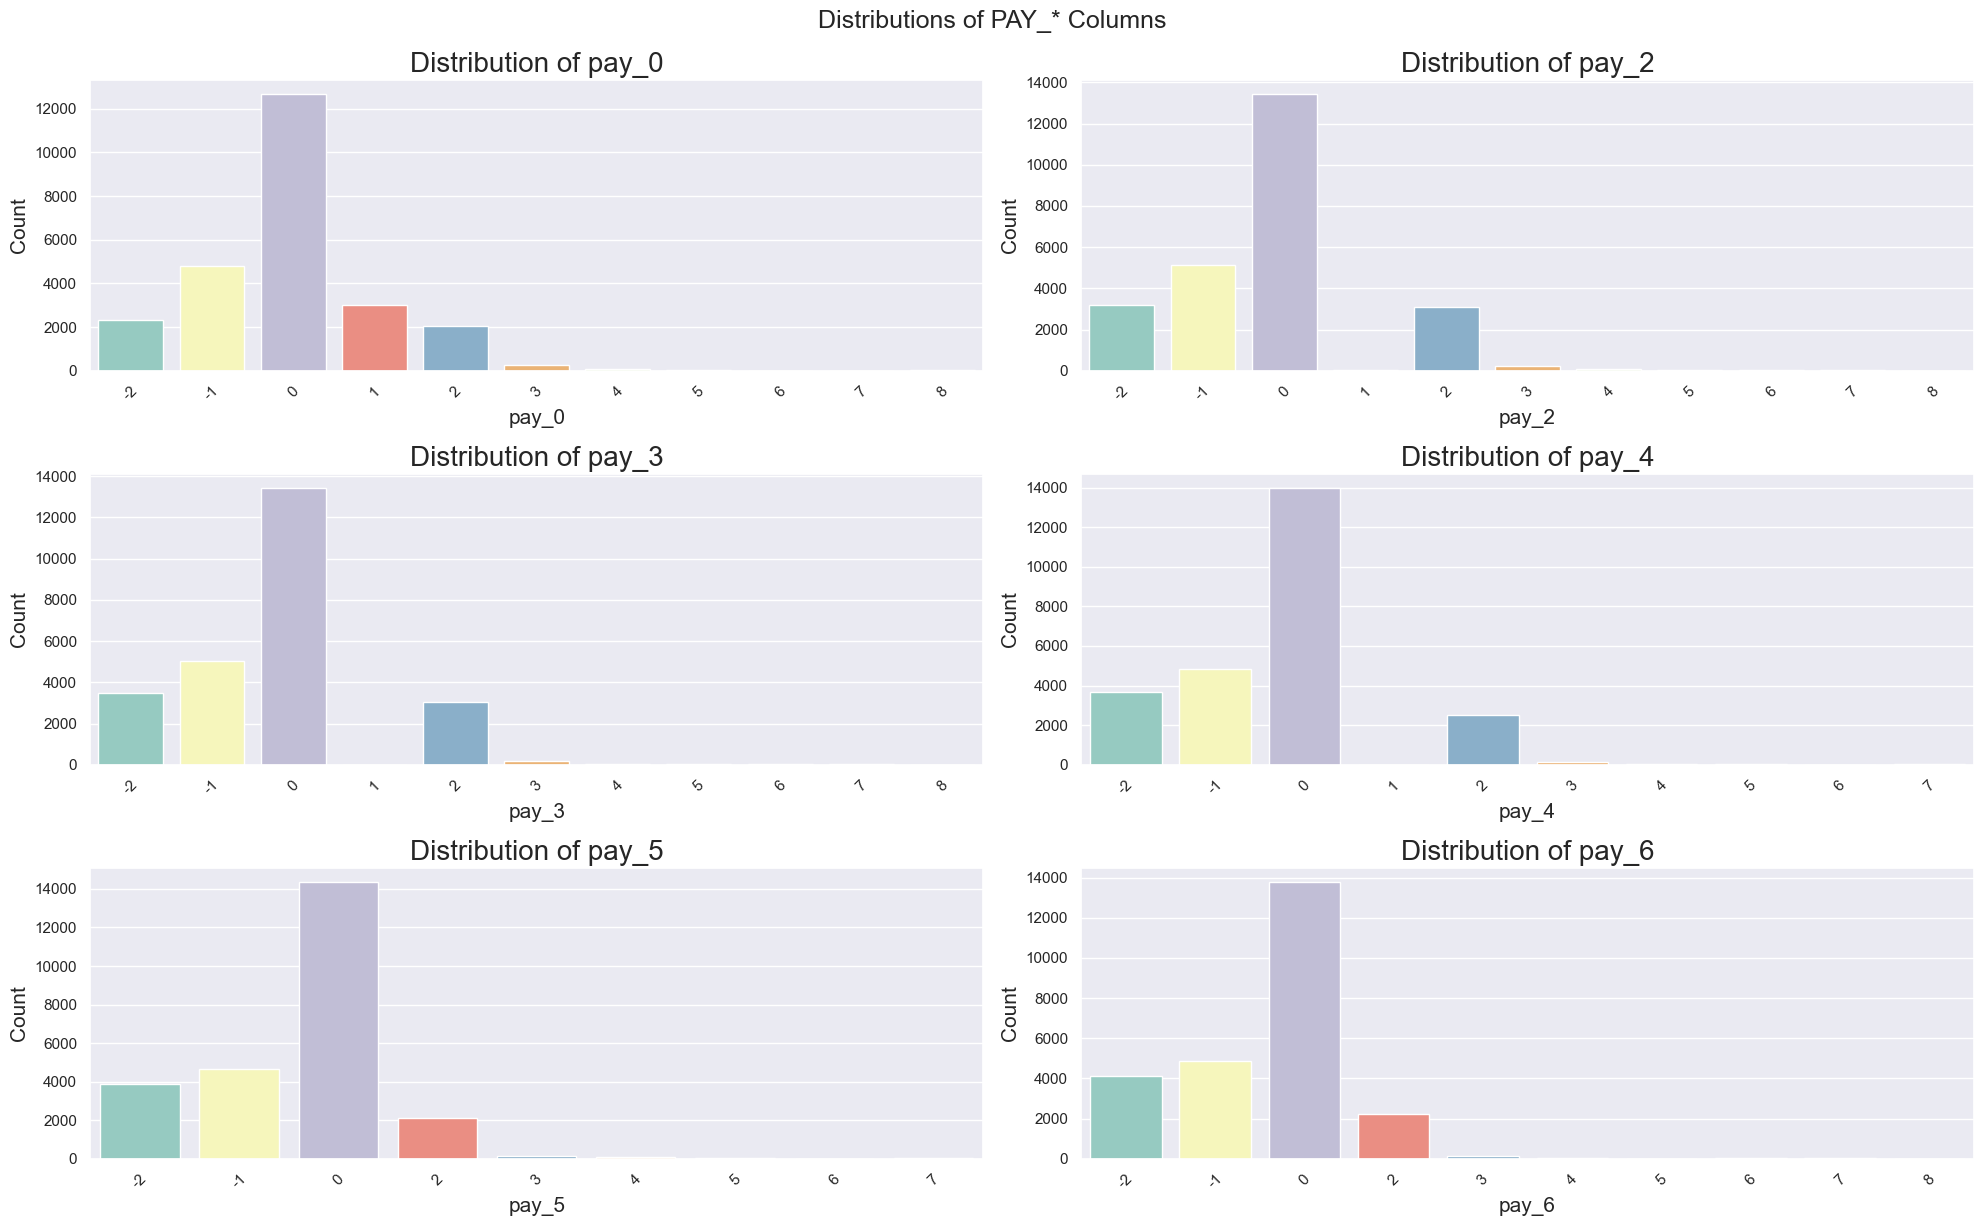

In [88]:
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (10, 3)

#pay_1 is not present in data
categorical_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
axes = axes.flatten()

custom_palette = sns.color_palette("Set3", 10)

for i, col in enumerate(categorical_cols):
    unique_vals = sorted(training_data[col].dropna().unique())
    palette_subset = {val: custom_palette[j % len(custom_palette)] for j, val in enumerate(unique_vals)}
    
    sns.countplot(data=training_data,x=col,hue=col,palette=palette_subset,ax=axes[i],dodge=False)
    axes[i].set_title(f'Distribution of {col}', fontsize=20)
    axes[i].set_xlabel(col, fontsize=15)
    axes[i].set_ylabel("Count", fontsize=15)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend().remove()

plt.tight_layout()
plt.suptitle("Distributions of PAY_* Columns", fontsize=18, y=1.02)
plt.show()


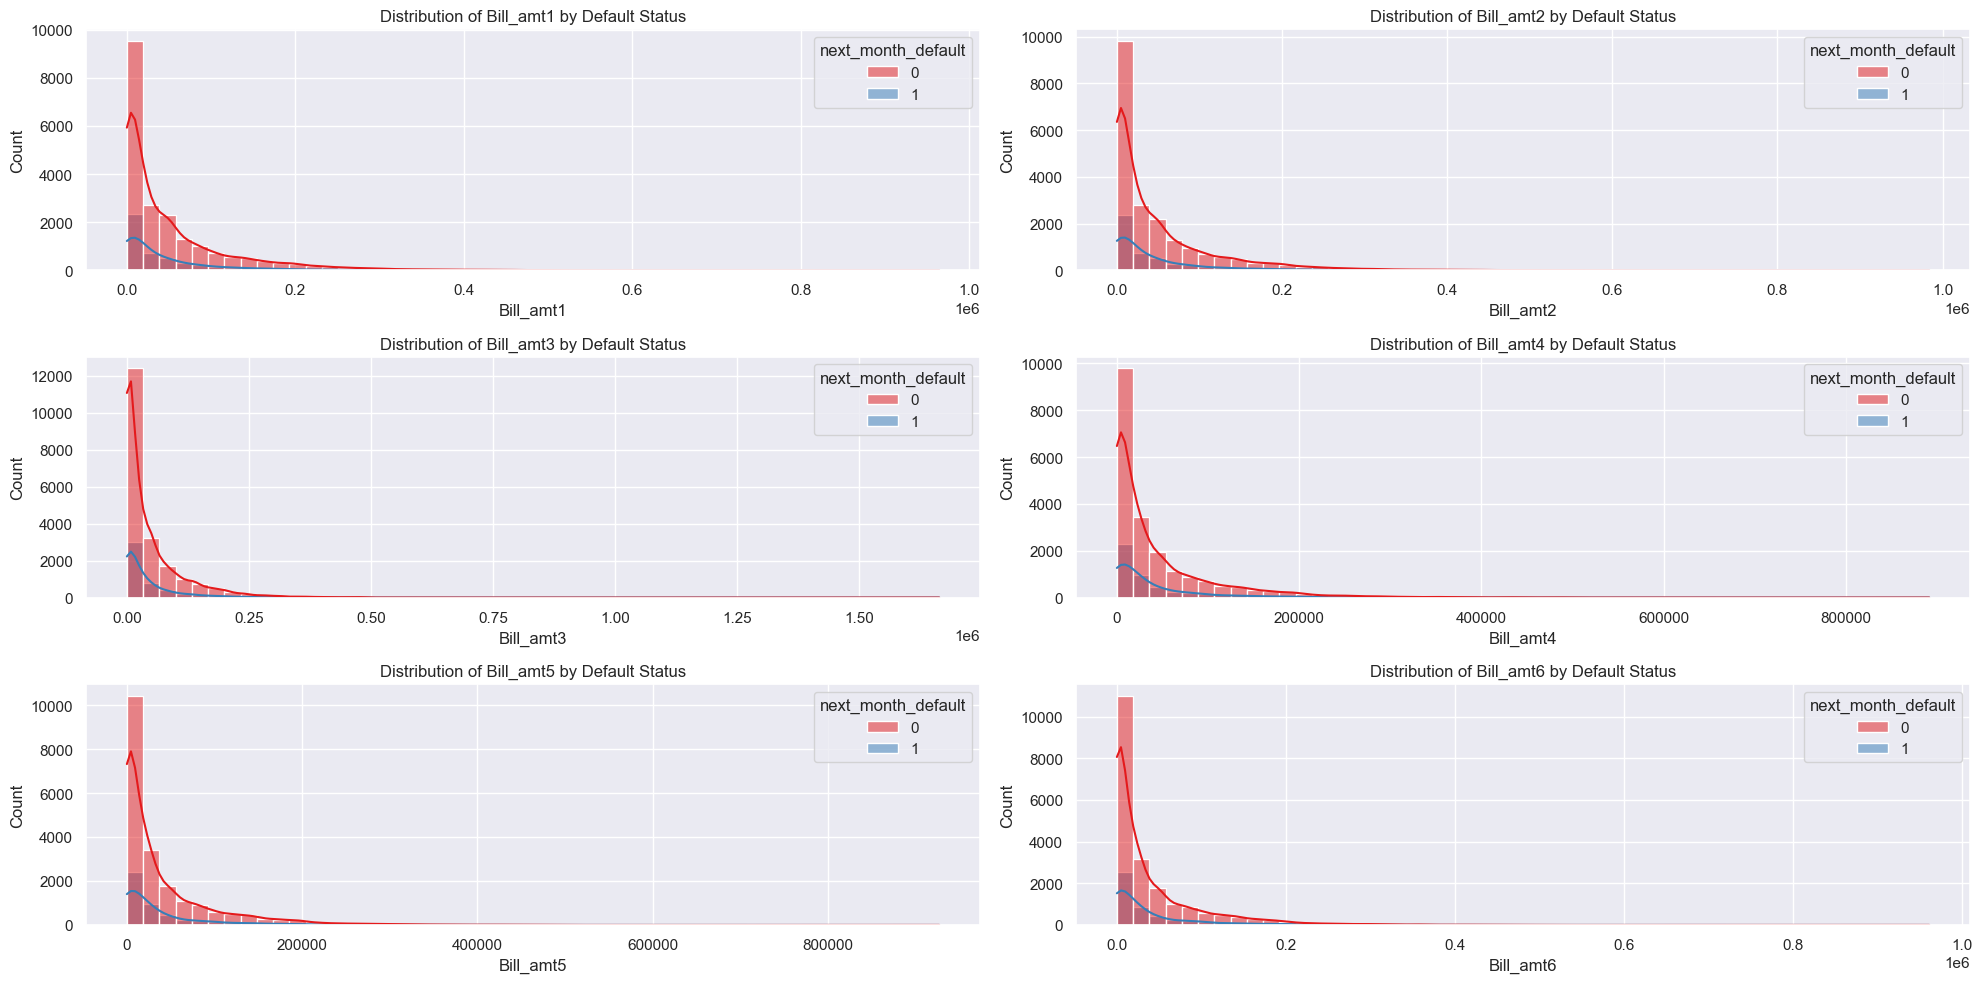

In [89]:
sns.set(style="darkgrid")

numerical_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:6]):
    sns.histplot(data=training_data, x=col, hue='next_month_default', bins=50, kde=True, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Default Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()



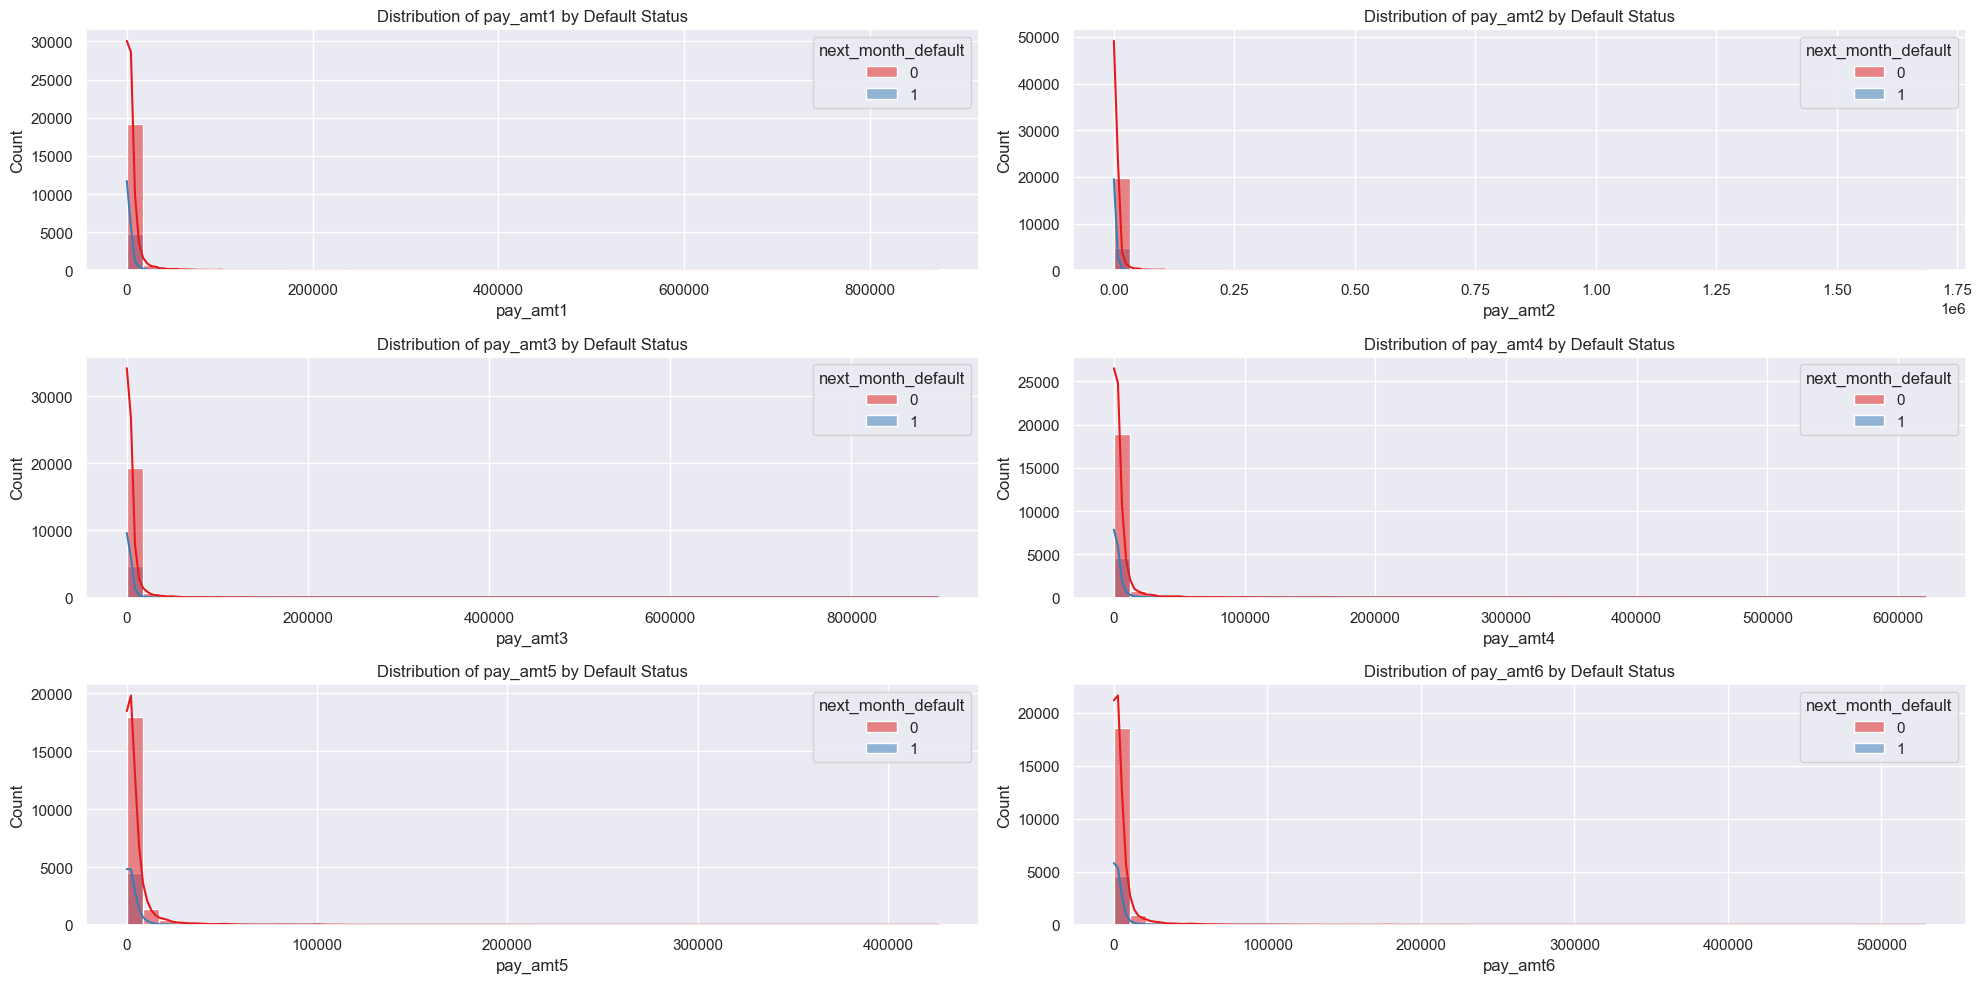

In [90]:
sns.set(style="darkgrid")

numerical_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:6]):
    sns.histplot(data=training_data, x=col, hue='next_month_default', bins=50, kde=True, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Default Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

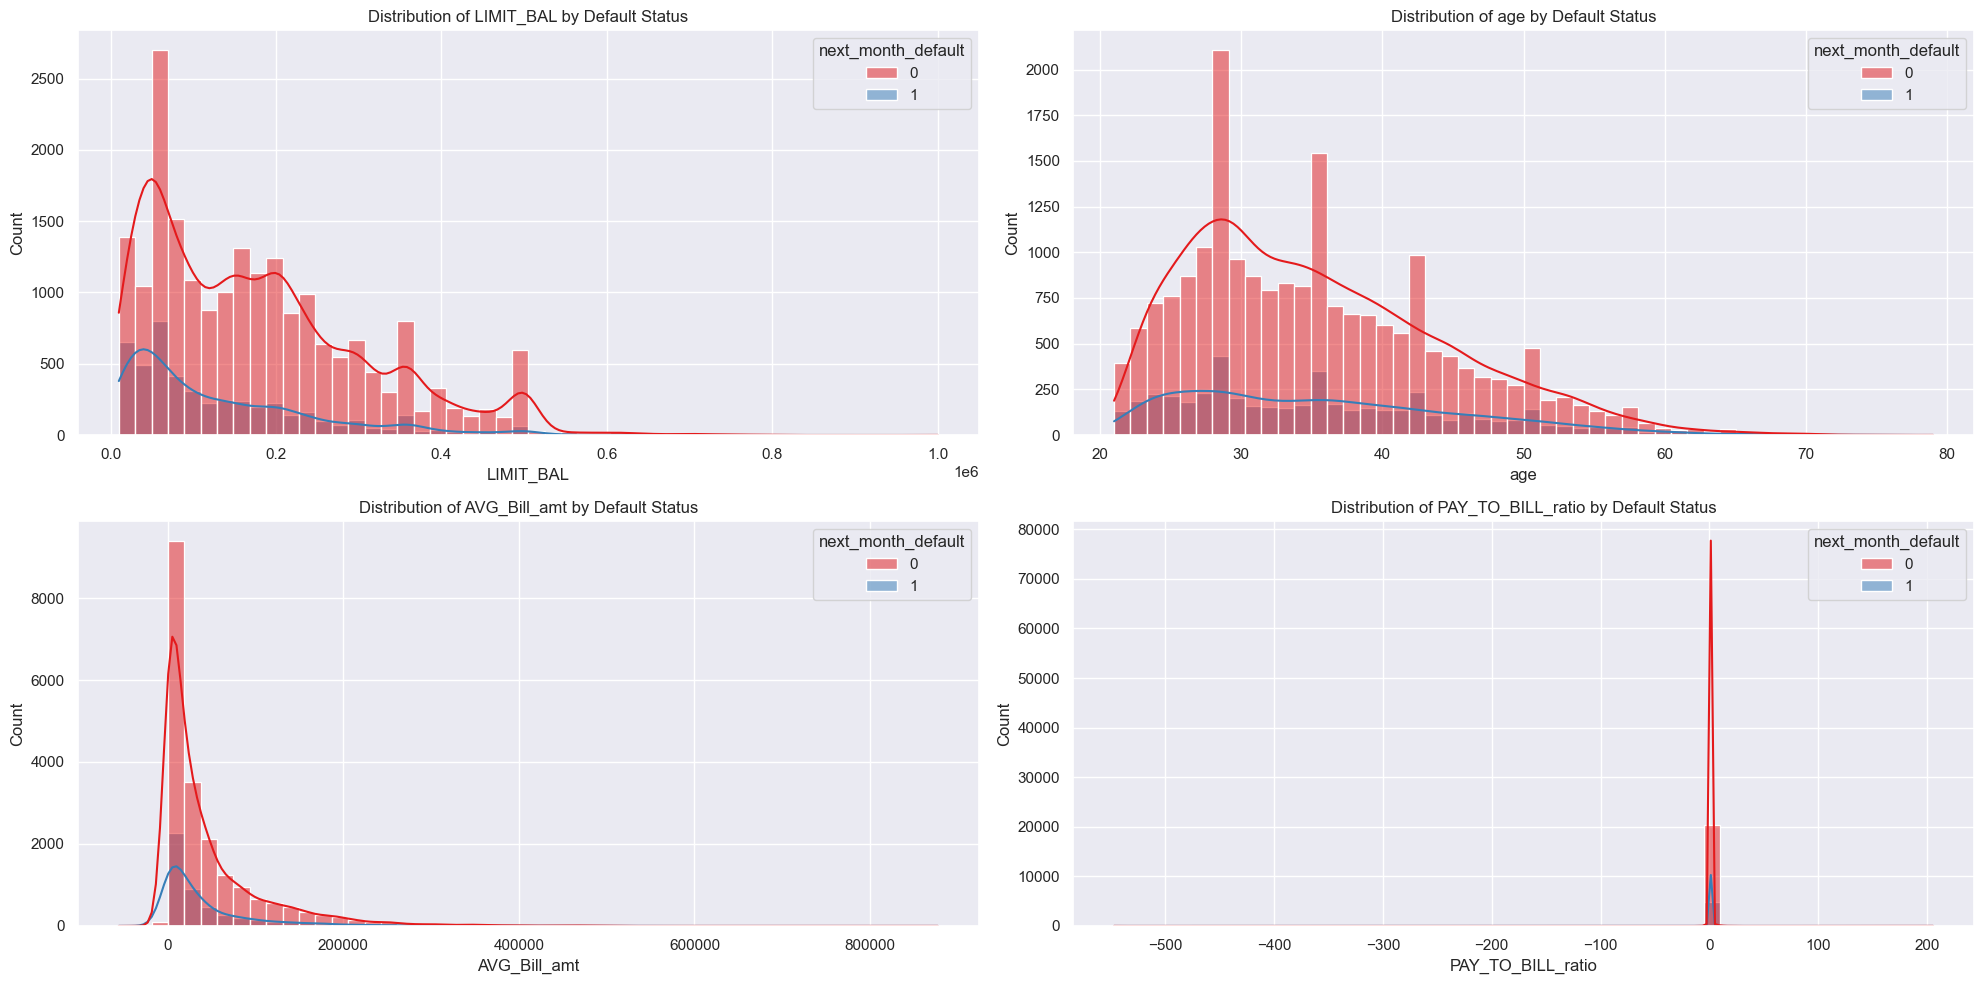

In [91]:
sns.set(style="darkgrid")

numerical_cols = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:4]):
    sns.histplot(data=training_data, x=col, hue='next_month_default', bins=50, kde=True, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Default Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

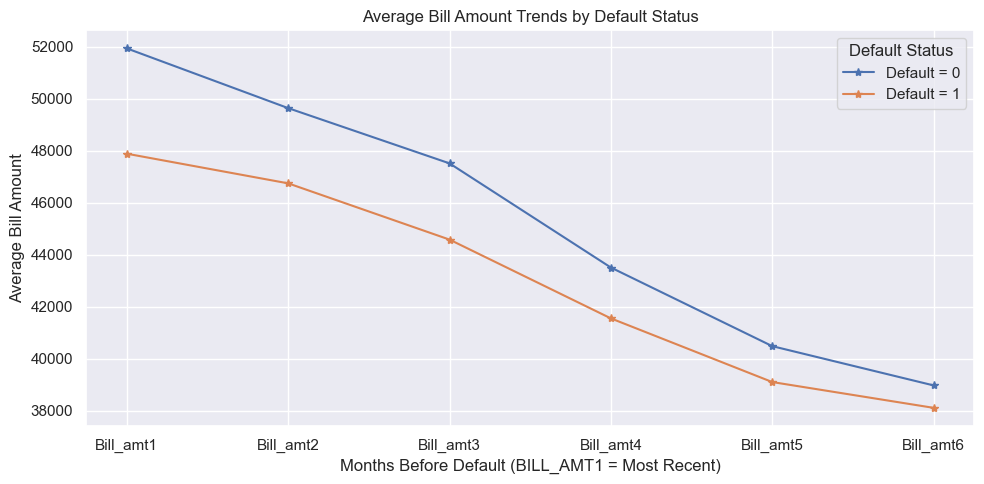

In [92]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]

bill_amt = training_data.groupby('next_month_default')[bill_cols].mean()

plt.figure(figsize=(10, 5))
for status in [0, 1]:
    plt.plot(bill_cols, bill_amt.loc[status],label=f'Default = {status}',marker='*')

plt.title('Average Bill Amount Trends by Default Status')
plt.xlabel('Months Before Default (BILL_AMT1 = Most Recent)')
plt.ylabel('Average Bill Amount')
plt.legend(title='Default Status')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\udayt\AppData\Local\Temp\ipykernel_16012\3538264713.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=training_data,x='next_month_default',y=col,ax=axes[idx],palette='RdYlBu')
C:\Users\udayt\AppData\Local\Temp\ipykernel_16012\3538264713.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=training_data,x='next_month_default',y=col,ax=axes[idx],palette='RdYlBu')
C:\Users\udayt\AppData\Local\Temp\ipykernel_16012\3538264713.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=training_data,x='next_month_default',y=col

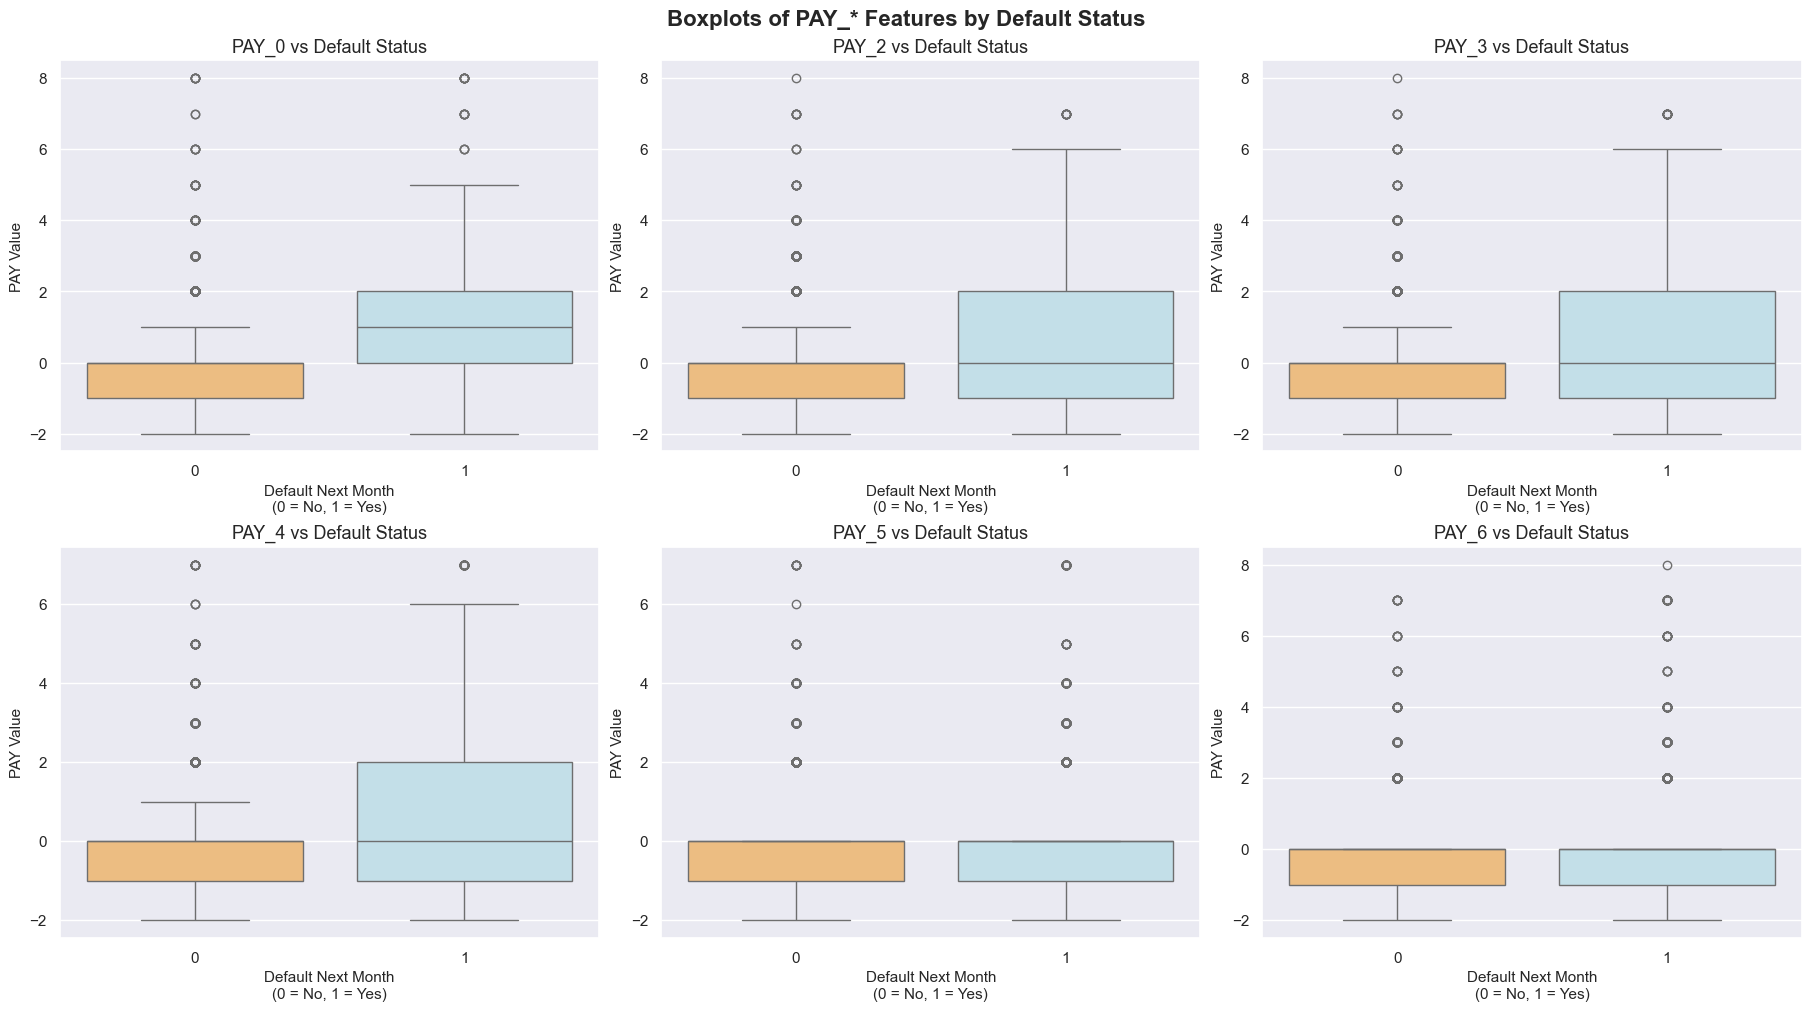

In [93]:

pay_columns = [f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]

sns.set_theme(style="darkgrid")
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), constrained_layout=True)
axes = axes.flatten()

for idx, col in enumerate(pay_columns):
    sns.boxplot(data=training_data,x='next_month_default',y=col,ax=axes[idx],palette='RdYlBu')
    axes[idx].set_title(f'{col.upper()} vs Default Status')
    axes[idx].set_xlabel("Default Next Month\n(0 = No, 1 = Yes)")
    axes[idx].set_ylabel("PAY Value")

fig.suptitle("Boxplots of PAY_* Features by Default Status", fontsize=16, weight='bold')
plt.show()


## 3) Feature Engineering


In [94]:
# Count of late payments (status > 0 means late)

pay_cols = ['pay_0' , 'pay_2' , 'pay_3' , 'pay_4' , 'pay_5' , 'pay_6']
training_data['total_late_payments'] = (training_data[pay_cols] > 0).sum(axis=1)

# Max delinquency severity
training_data['max_delinquency'] = training_data[pay_cols].max(axis=1)

# Current delinquency streak
def get_current_streak(row):
    streak = 0
    for i in pay_cols:  # Check PAY_0 first (most recent)
        if row[f'{i}'] > 0:
            streak += 1
        else:
            break
    return streak

training_data['current_delinquency_streak'] = training_data.apply(get_current_streak, axis=1)
training_data

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,AGE_GROUP,education_label,sex_label,Marriage_status,total_late_payments,max_delinquency,current_delinquency_streak
0,5017,2,0,2,60000,25.0,2,2,2,0,...,41511.50,0.03,0,20-30,University,Female,Single,3,2,3
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,2534.50,0.27,0,20-30,Graduate School,Male,Single,0,0,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,50422.00,0.04,0,60-70,University,Female,Married,0,0,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,86229.50,0.04,0,40-50,University,Male,Married,0,0,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,11814.33,0.72,0,30-40,Graduate School,Female,Single,0,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,82312.50,0.05,0,30-40,University,Male,Married,2,2,0
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,41371.67,0.14,1,40-50,University,Female,Married,0,0,0
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,3071.83,1.31,1,30-40,Graduate School,Female,Single,0,-1,0
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,197278.83,0.03,0,30-40,Others,Male,Married,0,0,0


In [95]:
# Count of months with only minimum payment (status = 0)
pay_cols = ['pay_0' , 'pay_2' , 'pay_3' , 'pay_4' , 'pay_5' , 'pay_6']
training_data['min_payment_months'] = (training_data[pay_cols] == 0).sum(axis=1)

# Count of months with full payment (status < 0)
training_data['full_payment_months'] = (training_data[pay_cols] < 0).sum(axis=1)

# Count of months with delayed payment (status > 0)
training_data['delayed_months'] = (training_data[pay_cols] > 0).sum(axis=1)

# Payment consistency
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]
training_data['payment_consistency'] = training_data[pay_amt_cols].std(axis=1)
training_data

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,education_label,sex_label,Marriage_status,total_late_payments,max_delinquency,current_delinquency_streak,min_payment_months,full_payment_months,delayed_months,payment_consistency
0,5017,2,0,2,60000,25.0,2,2,2,0,...,University,Female,Single,3,2,3,3,0,3,714.956931
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,Graduate School,Male,Single,0,0,0,3,3,0,1129.473118
2,5019,1,0,2,180000,63.0,0,0,0,0,...,University,Female,Married,0,0,0,6,0,0,123.925072
3,5020,1,1,2,210000,43.0,0,0,0,0,...,University,Male,Married,0,0,0,6,0,0,337.634028
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,Graduate School,Female,Single,0,-2,0,0,6,0,17912.037141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,University,Male,Married,2,2,0,4,0,2,1930.339559
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,University,Female,Married,0,0,0,6,0,0,7879.765467
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,Graduate School,Female,Single,0,-1,0,0,6,0,3743.889877
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,Others,Male,Married,0,0,0,6,0,0,863.822720


In [96]:
def generate_features(df):
    df = df.copy()

    #Repayment Consistency 
    repayment_cols = [f'pay_amt{i}' for i in range(1, 7)]
    df['Repayment_StdDev'] = df[repayment_cols].std(axis=1)

    #Monthly Repayment Ratios (Payment / Bill) 
    for i in range(1, 7):
        pay_col = f'pay_amt{i}'
        bill_col = f'Bill_amt{i}'
        df[f'Repay_Ratio_{i}'] = df[pay_col] / df[bill_col].replace(0, np.nan)

    #Overpayment Frequency (Negative bills)
    bill_columns = [f'Bill_amt{i}' for i in range(1, 7)]
    df['Overpay_Count'] = df[bill_columns].lt(0).sum(axis=1)

    # Utilization Ratio (Avg Bill / Limit) 
    df['Utilization_Rate'] = df['AVG_Bill_amt'] / df['LIMIT_BAL'].replace(0, np.nan)

    # Delinquency Features
    pay_status_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
    df['Delinquency_Total'] = df[pay_status_cols].ge(1).sum(axis=1)
    df['Max_Delinquency'] = df[pay_status_cols].max(axis=1)

    return df

# apply to both datasets
training_data = generate_features(training_data)
testing_data = generate_features(testing_data) 


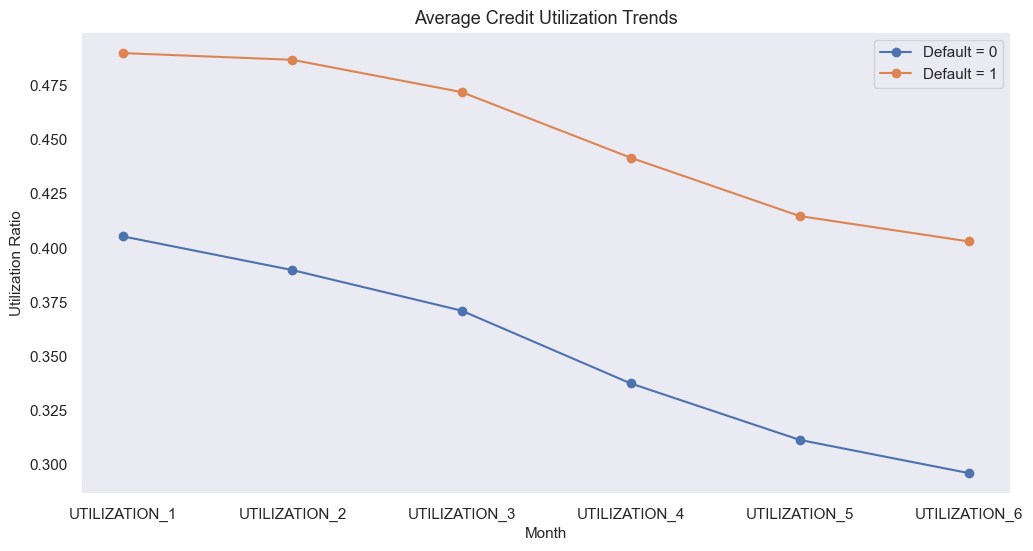

In [97]:
for i in range(1, 7):
    training_data[f'UTILIZATION_{i}'] = training_data[f'Bill_amt{i}'] / training_data['LIMIT_BAL']

util_cols = [f'UTILIZATION_{i}' for i in range(1, 7)]
util = training_data.groupby('next_month_default')[util_cols].mean()

plt.figure(figsize=(12, 6))
for status in [0, 1]:
    plt.plot(util_cols, util.loc[status],
             label=f"Default = {status}",
             marker='o')
plt.title('Average Credit Utilization Trends')
plt.xlabel('Month')
plt.ylabel('Utilization Ratio')
plt.legend()
plt.grid()
plt.show()

## 4) Data Pre-Processing

In [98]:
training_data_clean = training_data.drop(columns='Customer_ID', errors='ignore').copy()
testing_data_clean = testing_data.drop(columns='Customer_ID', errors='ignore').copy()

#use knn imputer for missing values
from sklearn.impute import SimpleImputer

numeric_cols = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'Utilization_Rate', 'Delinquency_Total', 'Max_Delinquency','Repayment_StdDev', 'Overpay_Count'
] + [f'pay_amt{i}' for i in range(1, 7)] + [f'Bill_amt{i}' for i in range(1, 7)] +  [f'Repay_Ratio_{i}' for i in range(1, 7)]

imputer = SimpleImputer(strategy='mean')

training_data_clean[numeric_cols] = imputer.fit_transform(training_data_clean[numeric_cols])
testing_data_clean[numeric_cols] = imputer.transform(testing_data_clean[numeric_cols]) # Use transform only for validation

In [99]:
# categorical columns to encode
categorical_cols = ['sex', 'education', 'marriage']

#Apply one-hot encoding to both train and validation datasets
training_data_encoded = pd.get_dummies(training_data_clean.copy(), columns=categorical_cols, drop_first=True)
testing_data_encoded = pd.get_dummies(testing_data_clean.copy(), columns=categorical_cols, drop_first=True)

training_data_encoded, testing_data_encoded = training_data_encoded.align(testing_data_encoded, join='left', axis=1, fill_value=0)

print("Train shape:", training_data_encoded.shape)
print("Testing shape:", testing_data_encoded.shape)


Train shape: (25247, 61)
Testing shape: (5016, 61)


In [100]:
from sklearn.preprocessing import StandardScaler 
import joblib

# scale numerical features ---
def scale_features(df, features, scaler=None):
    df = df.copy()

    existing_features = [feat for feat in features if feat in df.columns]

    if scaler is None:
        scaler = StandardScaler()
        df[existing_features] = scaler.fit_transform(df[existing_features])
    else:
        df[existing_features] = scaler.transform(df[existing_features])

    return df, scaler

numerical_features = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio','Utilization_Rate', 'Delinquency_Total', 'Max_Delinquency','Repayment_StdDev', 'Overpay_Count'
] + [f'pay_amt{i}' for i in range(1, 7)] +  [f'Bill_amt{i}' for i in range(1, 7)] +  [f'Repay_Ratio_{i}' for i in range(1, 7)]

# --- Scale train data ---
training_data_encoded, scaler = scale_features(training_data_encoded, numerical_features)

# --- Save scaler for future use ---
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [101]:
training_data_encoded.drop(['AGE_GROUP', 'education_label', 'Marriage_status','sex_label'], axis=1, inplace=True)
training_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   25247 non-null  float64
 1   age                         25247 non-null  float64
 2   pay_0                       25247 non-null  int64  
 3   pay_2                       25247 non-null  int64  
 4   pay_3                       25247 non-null  int64  
 5   pay_4                       25247 non-null  int64  
 6   pay_5                       25247 non-null  int64  
 7   pay_6                       25247 non-null  int64  
 8   Bill_amt1                   25247 non-null  float64
 9   Bill_amt2                   25247 non-null  float64
 10  Bill_amt3                   25247 non-null  float64
 11  Bill_amt4                   25247 non-null  float64
 12  Bill_amt5                   25247 non-null  float64
 13  Bill_amt6                   252

In [102]:
# Handling Class Imbalance since default came out to be 20%
# I will do it with SMOTE
from imblearn.over_sampling import SMOTE

X_train = training_data_encoded.drop(columns='next_month_default')
y_train = training_data_encoded['next_month_default']

# Initialize and fit the imputer on the training features (X_train)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Convert the imputed array back to a DataFrame to maintain column names
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample using the imputed data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

In [104]:
print(pd.Series(y_train_resampled).value_counts())

next_month_default
0    20440
1    20440
Name: count, dtype: int64


## 5) Model Building & Training`

In [105]:
def evaluate_model(model, X, y, model_name):
    print(f"\n🧪 Evaluating: {model_name}")
    start = time.time()

    # Cross-validated AUC scores
    auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

    # Cross-validated predictions
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Metrics
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, zero_division=0)
    rec = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)
    end = time.time()
  

    # Output
    print(f"AUC Scores (5-fold): {auc_scores}")
    print(f"Mean AUC: {auc_scores.mean():.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Training Time: {end - start:.2f} seconds")

# 1. Logistic Regression with Yeo-Johnson transformation
log_reg_pipeline = Pipeline([
    ('yeojohnson', PowerTransformer(method='yeo-johnson')),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'))
])
evaluate_model(log_reg_pipeline, X_train, y_train, "Logistic Regression (Yeo-Johnson)")

# 2. Decision Tree
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
evaluate_model(tree, X_train, y_train, "Decision Tree")

# 3. LightGBM (using resampled data)
lgbm = LGBMClassifier(n_estimators=100, force_row_wise='true', verbose=-1)
evaluate_model(lgbm, X_train_resampled, y_train_resampled, "LightGBM")

# 4. XGBoost
xgb = XGBClassifier(n_estimators=100, eval_metric='logloss', use_label_encoder=False)
evaluate_model(xgb, X_train, y_train, "XGBoost")

# 5. Random Forest
forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
evaluate_model(forest, X_train, y_train, "Random Forest")


🧪 Evaluating: Logistic Regression (Yeo-Johnson)
AUC Scores (5-fold): [0.7794549  0.77391768 0.76604656 0.76754685 0.76350518]
Mean AUC: 0.7701
Accuracy: 0.7469
Precision: 0.3967
Recall: 0.6318
F1 Score: 0.4874
Training Time: 17.04 seconds

🧪 Evaluating: Decision Tree
AUC Scores (5-fold): [0.62411993 0.60739612 0.60623731 0.59965603 0.60736533]
Mean AUC: 0.6090
Accuracy: 0.7627
Precision: 0.3727
Recall: 0.3607
F1 Score: 0.3666
Training Time: 12.57 seconds

🧪 Evaluating: LightGBM
AUC Scores (5-fold): [0.76704005 0.95865919 0.99621266 0.99606893 0.99555845]
Mean AUC: 0.9427
Accuracy: 0.8672
Precision: 0.9398
Recall: 0.7846
F1 Score: 0.8552
Training Time: 5.66 seconds

🧪 Evaluating: XGBoost


c:\Users\udayt\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\udayt\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\udayt\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\udayt\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:33] WARNING: C:\actio

AUC Scores (5-fold): [0.7663785  0.76169642 0.75850692 0.7527916  0.75964677]
Mean AUC: 0.7598
Accuracy: 0.8307
Precision: 0.6024
Recall: 0.3262
F1 Score: 0.4232
Training Time: 3.49 seconds

🧪 Evaluating: Random Forest
AUC Scores (5-fold): [0.77751754 0.773484   0.77416249 0.77267747 0.76930245]
Mean AUC: 0.7734
Accuracy: 0.8361
Precision: 0.6580
Recall: 0.2898
F1 Score: 0.4024
Training Time: 105.25 seconds


In [106]:
from lightgbm import LGBMClassifier
import joblib

# Initialize the LGBM model
final_model_lgb = LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model on resampled data
final_model_lgb.fit(X_train_resampled, y_train_resampled)

# Save the trained model
model_path = 'best_lgbm_model.pkl'
joblib.dump(final_model_lgb, model_path)
print(f"✅ LightGBM model saved successfully at: {model_path}")



✅ LightGBM model saved successfully at: best_lgbm_model.pkl


## 5.5) Hyperparameter Tunnning

In [107]:

# Pipelines
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=2000))
])

# Parameter Grids
param_dist_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

param_dist_dt = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

param_dist_lgbm = {
    'n_estimators': [200, 300, 400, 500],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70, 100, 150],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'min_child_samples': [10, 20, 30, 50],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Scoring Metrics
n_iter_search = 50
scoring = {'f1': make_scorer(f1_score), 'roc_auc': make_scorer(roc_auc_score)}

# Models for Tuning
decision_tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
xgboost_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
lightgbm_model = LGBMClassifier(random_state=42)

# Randomized SearchCV for each model
random_search_logreg = RandomizedSearchCV(
    logreg_pipeline, param_distributions=param_dist_logreg, n_iter=10, cv=5,
    scoring=scoring, refit='f1', random_state=42, n_jobs=-1
)

random_search_dt = RandomizedSearchCV(
    decision_tree_model, param_distributions=param_dist_dt, n_iter=n_iter_search, cv=5,
    scoring=scoring, refit='f1', random_state=42, n_jobs=-1
)

random_search_xgb = RandomizedSearchCV(
    xgboost_model, param_distributions=param_dist_xgb, n_iter=n_iter_search, cv=5,
    scoring=scoring, refit='f1', random_state=42, n_jobs=-1
)

random_search_lgbm = RandomizedSearchCV(
    lightgbm_model, param_distributions=param_dist_lgbm, n_iter=n_iter_search, cv=5,
    scoring=scoring, refit='f1', random_state=42, n_jobs=-1
)

# Fit RandomizedSearchCV
print("Tuning Logistic Regression...")
random_search_logreg.fit(X_train, y_train)

print("Tuning Decision Tree...")
random_search_dt.fit(X_train, y_train)

print("Tuning XGBoost...")
random_search_xgb.fit(X_train, y_train)

print("Tuning LightGBM...")
random_search_lgbm.fit(X_train, y_train)

# Best Estimators
best_logreg_model = random_search_logreg.best_estimator_
best_dt_model = random_search_dt.best_estimator_
best_xgb_model = random_search_xgb.best_estimator_
best_lgbm_model = random_search_lgbm.best_estimator_

print("✅ Hyperparameter tuning complete!")

Tuning Logistic Regression...
Tuning Decision Tree...
Tuning XGBoost...


c:\Users\udayt\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:34:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuning LightGBM...
✅ Hyperparameter tuning complete!


In [108]:
# --- Predictions Using Best (Tuned) Models ---
y_pred_logreg_best = best_logreg_model.predict(X_val)
y_pred_dt_best = best_dt_model.predict(X_val)
y_pred_xgb_best = best_xgb_model.predict(X_val)
y_pred_lgbm_best = best_lgbm_model.predict(X_val)

# --- Predictions Using Base Models (Before Tuning) ---
y_pred_logreg_base = log_reg_pipeline.predict(X_val)
y_pred_dt_base = tree.predict(X_val)
y_pred_xgb_base = xgb.predict(X_val)
y_pred_lgbm_base = lgbm.predict(X_val)

# --- Evaluation Function ---
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_pred)
    return [model_name, accuracy, precision, recall, f1, roc_auc]

# --- Evaluate All Models ---
results = []

# Base Models
results.append(evaluate_model(y_val, y_pred_logreg_base, "Logistic Regression (Base)"))
results.append(evaluate_model(y_val, y_pred_dt_base, "Decision Tree (Base)"))
results.append(evaluate_model(y_val, y_pred_xgb_base, "XGBoost (Base)"))
results.append(evaluate_model(y_val, y_pred_lgbm_base, "LightGBM (Base)"))

# Tuned Models
results.append(evaluate_model(y_val, y_pred_logreg_best, "Logistic Regression (Tuned)"))
results.append(evaluate_model(y_val, y_pred_dt_best, "Decision Tree (Tuned)"))
results.append(evaluate_model(y_val, y_pred_xgb_best, "XGBoost (Tuned)"))
results.append(evaluate_model(y_val, y_pred_lgbm_best, "LightGBM (Tuned)"))

# --- Summary Table ---
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"])
display(results_df)


NameError: name 'X_val' is not defined

## 6) Tuning Threshold



In [57]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Ensure lgbm is trained — if not, fit it first:
lgbm.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities (positive class)
y_probs_lgbm = lgbm.predict_proba(X_train_resampled)[:, 1]  # Probability of class 1

# Compute precision-recall pairs
precisions, recalls, thresholds = precision_recall_curve(y_train_resampled, y_probs_lgbm)

# Compute F2 score
beta = 2
f2_scores = (1 + beta*2) * (precisions * recalls) / (beta*2 * precisions + recalls + 1e-8)

# Find best threshold
best_idx = np.argmax(f2_scores)
best_threshold = thresholds[best_idx]

# Print best values
print(f"📊 Best Threshold for LightGBM (F2): {best_threshold:.4f}")
print(f"⭐ Best F2-Score: {f2_scores[best_idx]:.4f}")

📊 Best Threshold for LightGBM (F2): 0.1974
⭐ Best F2-Score: 0.9212


## 7) Prediction On Validation Data

In [59]:
import joblib
import numpy as np
import pandas as pd

# List of numerical features to scale (same as training)
numerical_features = [
    'LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio','Utilization_Rate', 'Delinquency_Total', 'Max_Delinquency','Repayment_StdDev', 'Overpay_Count'
] + [f'pay_amt{i}' for i in range(1, 7)] + \
    [f'Bill_amt{i}' for i in range(1, 7)] + \
    [f'Repay_Ratio_{i}' for i in range(1, 7)]

# Load saved scaler
scaler = joblib.load('scaler.pkl')

# Drop the target column for prediction since this is unlabeled data scenario
X_val_unlabeled = testing_data_encoded.drop(columns=['next_month_default'])

# Scale numerical features of validation data
X_val_unlabeled[numerical_features] = scaler.transform(X_val_unlabeled[numerical_features])

# Your trained best Random Forest model (load or keep in memory)
# Example: best_rf_model = joblib.load('random_forest_model.pkl')
best_lgb_model = joblib.load('best_lgbm_model.pkl')        # replace with your loaded/trained Random Forest model

# Predict probabilities for the positive class
y_val_probs = best_lgb_model.predict_proba(X_val_unlabeled , predict_disable_shape_check = 'true')[:, 1]

# Apply threshold aligned with bank’s risk appetite
best_threshold = 0.5
y_val_pred = (y_val_probs >= best_threshold).astype(int)

# Prepare dataframe with results
predictions_df = pd.DataFrame({
    'probability_default': y_val_probs,
    'predicted_default': y_val_pred
})

print(f"Predictions generated with threshold {best_threshold}")
print(predictions_df.head())




Predictions generated with threshold 0.5
   probability_default  predicted_default
0             0.421017                  0
1             0.347131                  0
2             0.356021                  0
3             0.809265                  1
4             0.406080                  0


In [60]:
print(predictions_df['predicted_default'].value_counts())

predicted_default
1    3002
0    2014
Name: count, dtype: int64


In [61]:
predictions_df.insert(0, 'Customer_ID', testing_data['Customer_ID'].values)


In [62]:
predictions_df

,Customer_ID,probability_default,predicted_default
0,1,0.421017,0
1,2,0.347131,0
2,3,0.356021,0
3,4,0.809265,1
4,5,0.406080,0
...,...,...,...
5011,5012,0.659356,1
5012,5013,0.507743,1
5013,5014,0.432288,0
5014,5015,0.655430,1


In [63]:

predictions_df.to_csv('validation_predictions.csv', index=False)

In [64]:
# # Drop the target column for prediction since this is unlabeled data scenario
X_val_unlabeled = testing_data_encoded.drop(columns=['next_month_default'])

# # Scale numerical features of validation data
X_val_unlabeled[numerical_features] = scaler.transform(X_val_unlabeled[numerical_features])

# # Your trained best Random Forest model (load or keep in memory)
# # Example: best_rf_model = joblib.load('random_forest_model.pkl')
best_lgb_model = joblib.load('best_lgbm_model.pkl')        # replace with your loaded/trained Random Forest model

# # Predict probabilities for the positive class
y_val_probs = best_lgb_model.predict_proba(X_val_unlabeled , predict_disable_shape_check = 'true')[:, 1]

import pandas as pd
import numpy as np
from sklearn.metrics import fbeta_score, precision_recall_curve
from lightgbm import LGBMClassifier

# ✅ Define and train LightGBM
final_model_lgbm = LGBMClassifier(n_estimators=100, force_row_wise='true', verbose=-1)
final_model_lgbm.fit(X_train_resampled, y_train_resampled)


# ✅ Final predicted labels using best threshold
y_pred_final = (y_probs >= best_threshold).astype(int)

# ✅ Export to CSV
output_df = pd.DataFrame({
    # "Actual": y_val,
    "Predicted": y_pred_final,
    "Probabilities": y_probs
})
output_df.to_csv("lightgbm_predictions.csv", index=False)
print("✅ Predictions saved to 'lightgbm_predictions.csv'")


NameError: name 'y_probs' is not defined

## 8) Business Impact

In [ ]:
#cell 11.5 - Business Impact Analysis
from sklearn.metrics import confusion_matrix
def calculate_business_impact(y_true, y_pred, loan_amount_avg=50000):
    """Calculate business impact of the model"""
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Assume average loan amount and costs
    avg_loan = loan_amount_avg
    cost_of_default = avg_loan * 0.4  # 40% loss on default
    cost_of_investigation = avg_loan * 0.05  # 5% cost to investigate/reject
    
    # Calculate costs
    cost_false_negatives = fn * cost_of_default  # Missed defaults
    cost_false_positives = fp * cost_of_investigation  # Unnecessary investigations
    total_cost = cost_false_negatives + cost_false_positives
    
    # Potential savings compared to no model
    total_defaults = tp + fn
    cost_without_model = total_defaults * cost_of_default
    savings = cost_without_model - total_cost
    
    print(f"Business Impact Analysis:")
    print(f"Total Cost with Model: ${total_cost:,.2f}")
    print(f"Cost without Model: ${cost_without_model:,.2f}")
    print(f"Potential Savings: ${savings:,.2f}")
    print(f"Cost of False Negatives: ${cost_false_negatives:,.2f}")
    print(f"Cost of False Positives: ${cost_false_positives:,.2f}")
    
    return savings

# Calculate business impact
business_savings = calculate_business_impact(y_val, y_pred_lgbm)